In [1]:
!pip install neurokit2

In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

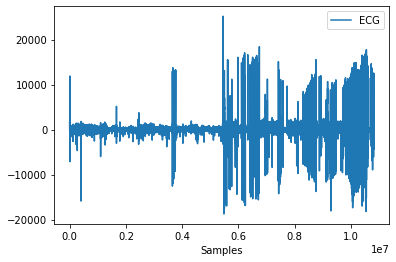

In [25]:
# Retrieve ECG data from data folder
ecg_signal = pd.read_csv("C:/Users/swaru/Downloads/10-50-33.EDF-6360D1AD346CB.csv")
# ecg_signal = nk.data(dataset="")
nk.signal_plot(ecg_signal)

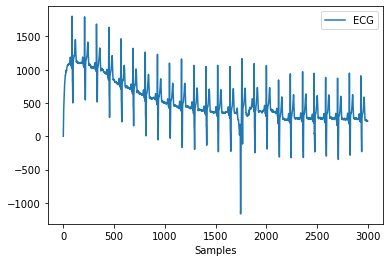

In [26]:
nk.signal_plot(ecg_signal[0:3000])

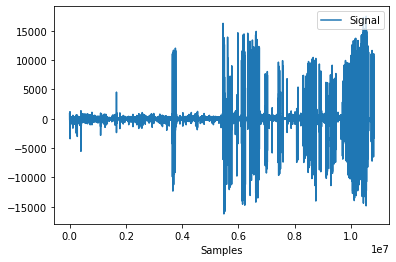

In [27]:
ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit')
nk.signal_plot(ecg_signal)

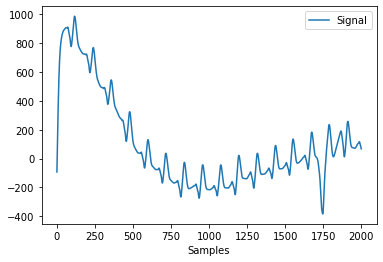

In [28]:
nk.signal_plot(ecg_signal[0:2000])

In [29]:
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=200)

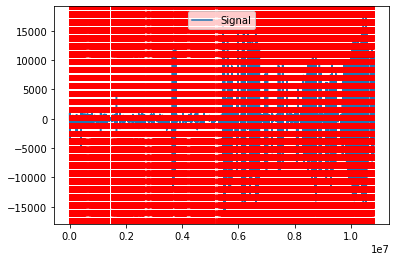

In [30]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

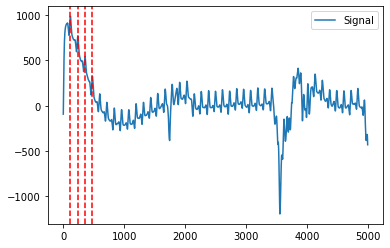

In [31]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:4], ecg_signal[0:5000])

In [33]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=200, method="peak")

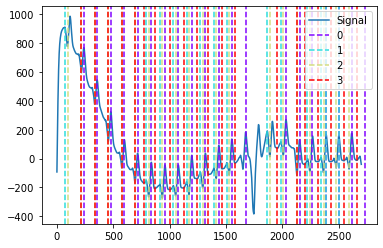

In [34]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:20], 
                       waves_peak['ECG_P_Peaks'][:20],
                       waves_peak['ECG_Q_Peaks'][:20],
                       waves_peak['ECG_S_Peaks'][:20]], ecg_signal[0:2700])

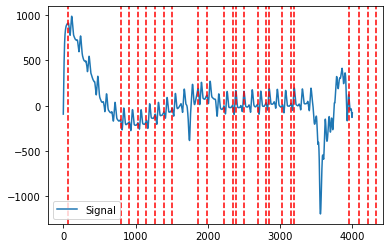

In [35]:
plot = nk.events_plot(waves_peak['ECG_P_Peaks'][:30], ecg_signal[0:4000])

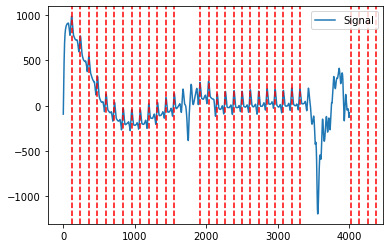

In [36]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:30], ecg_signal[0:4000])

In [39]:
# finding distance between 2 sucessive r peaks (distance_between_r_peaks)
distance_between_r_peaks = [j-i for i, j in zip(rpeaks['ECG_R_Peaks'][:-1], rpeaks['ECG_R_Peaks'][1:])]
print(np.array(distance_between_r_peaks))
print('Total number of beats in a signal:',len(distance_between_r_peaks)) #total number of beats in a signal

[  123   117   122 ...   195   203 10944]
Total number of beats in a signal: 30100


In [40]:
np.array(waves_peak['ECG_P_Peaks'][:20])

array([  71.,   nan,   nan,   nan,   nan,   nan,  792.,  913., 1032.,
       1150., 1272., 1392., 1507., 1866., 1986.,   nan, 2222., 2342.,
       2387., 2500.])

In [41]:
np.array(rpeaks['ECG_R_Peaks'][:20])

array([ 116,  239,  356,  478,  598,  715,  837,  957, 1076, 1195, 1317,
       1436, 1551, 1911, 2031, 2152, 2266, 2387, 2500, 2614])

In [63]:
n=[]
sb=[]
st=[]
p=[]
for i in range(0,len(rpeaks['ECG_R_Peaks'])-2):
    a1=waves_peak['ECG_P_Peaks'][i]
    a=rpeaks['ECG_R_Peaks'][i]
    b1=waves_peak['ECG_P_Peaks'][i+1]
    b=rpeaks['ECG_R_Peaks'][i+1]
    y=np.isnan(b1)
    if b-a>120 and b-a<200 and a-a1<=48 and a-a1>=32 and y==False : #BPM>60 AND BPM<100
        n.append(i)
    elif b-a>=200 and b-a<=240 and a-a1<=48 and a-a1>=32 and y==False: #BPM<60 AND BPM>50 --------  BPM=300/NUMBER OF LARGE SQAURES (1 LARGE SQUARE=40 SAMPLES)
        sb.append(i)
    elif b-a<=120 and b-a>=70 and a-a1<=48 and a-a1>=32 and y==False: #BPM>100 AND BPM<170
        st.append(i)
    elif b-a>=600 and a-a1<=48 and a-a1>=32 and y==False:
        p.append(i)
print('Normal beats: ',n)
print("-----------------------------------")
print('Sinus bradycardia beats: ',sb)
print("-----------------------------------")
print('Sinus tachycardia beats: ',st)
print("-----------------------------------")
print('Pause beats: ',p)

Normal beats:  [9, 16, 34, 55, 59, 65, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 113, 114, 118, 122, 132, 133, 134, 135, 377, 380, 448, 468, 471, 475, 477, 482, 495, 510, 516, 517, 519, 523, 553, 554, 555, 556, 560, 565, 806, 913, 914, 915, 916, 917, 918, 919, 920, 922, 925, 933, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 952, 953, 965, 966, 967, 969, 970, 971, 973, 974, 975, 977, 978, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 993, 1002, 1003, 1004, 1006, 1007, 1008, 1009, 1010, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1053, 1058, 1062, 1068, 1069, 1070, 1071, 1073, 1075, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1092, 1093, 1094, 1096, 1097, 1098, 1100, 1101, 1102, 1103, 1105, 1106, 1107, 1110, 1113, 1114, 1115, 1117, 1118, 1119, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 114

"for i in range(0,3):\n    i3=sb[i]\n    x3=rpeaks['ECG_R_Peaks'][i3]\n    y3=ecg_signal[rpeaks['ECG_R_Peaks'][i3]]\n    type='sb'\n    plt.scatter(x3, y3, marker='x', color='red')\n    plt.text(x3+0.5, y3+0.5, type, fontsize=15)"

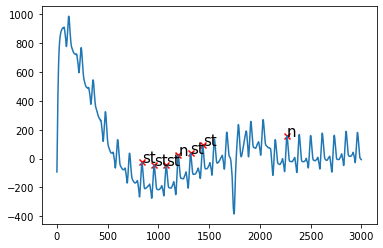

In [67]:
plt.plot(ecg_signal[0:3000])
for i in range(0,5):
    i1=st[i]
    x1=rpeaks['ECG_R_Peaks'][i1]
    y1=ecg_signal[rpeaks['ECG_R_Peaks'][i1]]
    type='st'
    plt.scatter(x1, y1, marker='x', color='red')
    plt.text(x1+0.5, y1+0.5, type, fontsize=15)
for i in range(0,2):
    i2=n[i]
    x2=rpeaks['ECG_R_Peaks'][i2]
    y2=ecg_signal[rpeaks['ECG_R_Peaks'][i2]]
    type='n'
    plt.scatter(x2, y2, marker='x', color='red')
    plt.text(x2+0.5, y2+0.5, type, fontsize=15)
'''for i in range(0,3):
    i3=sb[i]
    x3=rpeaks['ECG_R_Peaks'][i3]
    y3=ecg_signal[rpeaks['ECG_R_Peaks'][i3]]
    type='sb'
    plt.scatter(x3, y3, marker='x', color='red')
    plt.text(x3+0.5, y3+0.5, type, fontsize=15)'''

In [50]:
'''n=[]
sb=[]
st=[]
for i in range(0,len(rpeaks['ECG_R_Peaks'])-2):
    a=rpeaks['ECG_R_Peaks'][i]
    b=rpeaks['ECG_R_Peaks'][i+1]
    if b-a>120 and b-a<200: #BPM>60 AND BPM<100
        n.append(i)
    elif b-a>=200 and b-a<=240: #BPM<60 AND BPM>50 --------  BPM=300  NUMBER OF LARGE SQAURES (1 LARGE SQUARE=40 SAMPLES)
        sb.append(i)
    elif b-a<=120 and b-a>=70: #BPM>100 AND BPM<170
        st.append(i)
print('Normal beats:',n)   
print('Sinus bradycardia beats',sb)
print('Sinus tachycardia beats',st)'''

Normal beats: [0, 2, 5, 9, 14, 16, 34, 39, 53, 55, 57, 59, 65, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 118, 120, 122, 132, 133, 134, 135, 377, 380, 385, 401, 440, 448, 468, 471, 475, 477, 482, 495, 510, 512, 513, 516, 517, 519, 523, 553, 554, 555, 556, 560, 565, 770, 806, 913, 914, 915, 916, 917, 918, 919, 920, 922, 925, 933, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 952, 953, 965, 966, 967, 969, 970, 971, 973, 974, 975, 977, 978, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 993, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1043, 1053, 1058, 1062, 1068, 1069, 1070, 1071, 1073, 1075, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1092, 1093, 1094, 1096, 1097, 1098, 1100, 1101, 1102, 1103, 1105, 1106, 1107, 1109, 1110, 1113, 1114, 1115, 1117, 

"for i in range(0,3):\n    i3=sb[i]\n    x3=rpeaks['ECG_R_Peaks'][i3]\n    y3=ecg_signal[rpeaks['ECG_R_Peaks'][i3]]\n    type='sb'\n    plt.scatter(x3, y3, marker='x', color='red')"

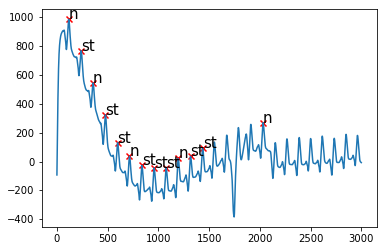

In [61]:
plt.plot(ecg_signal[0:3000])
for i in range(0,8):
    i1=st[i]
    x1=rpeaks['ECG_R_Peaks'][i1]
    y1=ecg_signal[rpeaks['ECG_R_Peaks'][i1]]
    type='st'
    plt.scatter(x1, y1, marker='x', color='red')
    plt.text(x1+0.5, y1+0.5, type, fontsize=15)
for i in range(0,5):
    i2=n[i]
    x2=rpeaks['ECG_R_Peaks'][i2]
    y2=ecg_signal[rpeaks['ECG_R_Peaks'][i2]]
    type='n'
    plt.scatter(x2, y2, marker='x', color='red')
    plt.text(x2+0.5, y2+0.5, type, fontsize=15)
'''for i in range(0,3):
    i3=sb[i]
    x3=rpeaks['ECG_R_Peaks'][i3]
    y3=ecg_signal[rpeaks['ECG_R_Peaks'][i3]]
    type='sb'
    plt.scatter(x3, y3, marker='x', color='red')'''